In [2]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from State import State

In [4]:
def main_algo(maze: Maze, rewards, eps=0.1, alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = set()
    for reward in rewards:
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates.add(State(reward[0], reward[1], 1))

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0

    # keep learning until you decide to stop
    while not stop:
        

        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append(robot.nr_of_actions_since_reset)
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    return steps_per_iter

In [6]:
#1.4

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]
eps=0.1
alfa=0.7
gamma=0.9
max_iter=30000
max_episodes=16
steps_per_episode = []
runs_reaching_episode = []


for i in range(10):
    reward_coordinates = set()
    for reward in rewards:
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates.add(State(reward[0], reward[1], 1))

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    steps_per_episode = []
    runs_reaching_episode = []
    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        #learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break
        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append(robot.nr_of_actions_since_reset)
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    print(steps_per_iter)

    for i in range(len(steps_per_iter)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append(0)
    
    for i in range(len(steps_per_iter)):
        steps_per_episode[i] += steps_per_iter[i]
        runs_reaching_episode[i] += 1

    

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
2770
2358
1520
784
1008
848
1740
400
2108
712
1396
590
2074
680
1912
[2770, 2358, 1520, 784, 1008, 848, 1740, 400, 2108, 712, 1396, 590, 2074, 680, 1912, 590]
Made EGreedy
238
1096
2128
828
2156
2164
866
584
1304
158
1924
562
348
402
872
[238, 1096, 2128, 828, 2156, 2164, 866, 584, 1304, 158, 1924, 562, 348, 402, 872, 530]
Made EGreedy
4202
1098
3546
3064
1230
1036
2858
1488
168
916
888
572
848
536
1372
[4202, 1098, 3546, 3064, 1230, 1036, 2858, 1488, 168, 916, 888, 572, 848, 536, 1372, 856]
Made EGreedy
2604
1658
3888
172
1656
966
618
2224
912
1538
298
2442
386
620
992
[2604, 1658, 3888, 172, 1656, 966, 618, 2224, 912, 1538, 298, 2442, 386, 620, 992, 1374]
Made EGreedy
476
4506
750
5180
570
6864
1904
144
548
562
1546
662
348
814
1136
[476, 4506, 750, 5180, 570, 6864, 1904, 144, 548, 562, 1546, 662, 348, 814, 1136, 640]
Made EGreedy
1168
930
494
1210
2204
430
144
2418
2260
1084
334
760
466
334
2292
[1168, 930, 494, 1210, 2204, 4

[3096, 596, 4280, 1906, 134, 284, 1648, 402, 584, 2318, 552, 816, 560, 2138, 812, 4694]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3096.0, 596.0, 4280.0, 1906.0, 134.0, 284.0, 1648.0, 402.0, 584.0, 2318.0, 552.0, 816.0, 560.0, 2138.0, 812.0, 4694.0]


(0.0, 5000.0)

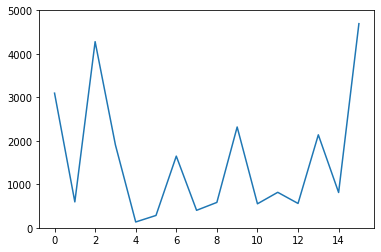

In [9]:
import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode) / np.array(runs_reaching_episode)

print(y.tolist())
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 5000)

In [13]:
#1.5 and 1.6

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
eps = 0.1

for runNumber in range(10):
    res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append(0)
    
    for i in range(len(res)):
        steps_per_episode[i] += res[i]
        runs_reaching_episode[i] += 1

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
1264
360
88
346
1764
1488
228
700
202
162
620
108
540
106
236
316
204
34
112
60
186
24
58
32
30
24
28
50
26
26
24
68
26
30
28
26
28
30
30
[1264, 360, 88, 346, 1764, 1488, 228, 700, 202, 162, 620, 108, 540, 106, 236, 316, 204, 34, 112, 60, 186, 24, 58, 32, 30, 24, 28, 50, 26, 26, 24, 68, 26, 30, 28, 26, 28, 30, 30, 24]
Made EGreedy
392
1494
368
1194
380
310
792
264
270
96
254
320
134
172
346
48
100
146
54
70
136
28
34
66
36
42
34
30
26
26
32
26
26
28
28
28
32
36
26
[392, 1494, 368, 1194, 380, 310, 792, 264, 270, 96, 254, 320, 134, 172, 346, 48, 100, 146, 54, 70, 136, 28, 34, 66, 36, 42, 34, 30, 26, 26, 32, 26, 26, 28, 28, 28, 32, 36, 26, 28]
Made EGreedy
50
976
352
608
1538
1158
334
248
818
242
430
256
72
56
104
116
474
186
220
58
60
112
60
66
26
24
26
32
28
26
30
34
26
26
26
26
28
26
28
[50, 976, 352, 608, 1538, 1158, 334, 248, 818, 242, 430, 256, 72, 56, 104, 116, 474, 186, 220, 58, 60, 112, 60, 66, 26, 24, 26, 32, 28, 26, 30, 

[3468, 3000, 3906, 4178, 1556, 1608, 824, 1978, 866, 704, 1148, 520, 874, 410, 852, 554, 426, 278, 398, 410, 248, 182, 152, 104, 162, 86, 76, 84, 86, 84, 80, 86, 78, 84, 100, 92, 78, 78, 88, 86]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1156.0, 1000.0, 1302.0, 1392.6666666666667, 518.6666666666666, 536.0, 274.6666666666667, 659.3333333333334, 288.6666666666667, 234.66666666666666, 382.6666666666667, 173.33333333333334, 291.3333333333333, 136.66666666666666, 284.0, 184.66666666666666, 142.0, 92.66666666666667, 132.66666666666666, 136.66666666666666, 82.66666666666667, 60.666666666666664, 50.666666666666664, 34.666666666666664, 54.0, 28.666666666666668, 25.333333333333332, 28.0, 28.666666666666668, 28.0, 26.666666666666668, 28.666666666666668, 26.0, 28.0, 33.333333333333336, 30.666666666666668, 26.0, 26.0, 29.333333333333332, 28.666666666666668]


(0.0, 2000.0)

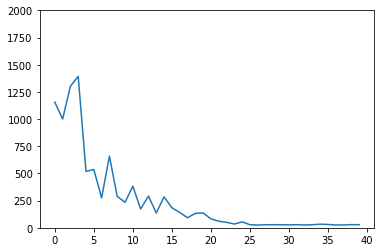

In [23]:
import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode) / np.array(runs_reaching_episode)

print(y.tolist())
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 2000)

In [18]:
#1.7

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
epsilons = [0.01, 0.25, 0.5, 0.75]

for ind, eps in enumerate(epsilons):
    steps_per_episode.append([])
    runs_reaching_episode.append([])

    for runNumber in range(10):
        res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
        print(res)

        for i in range(len(res)):
            if i >= len(runs_reaching_episode[ind]):
                runs_reaching_episode[ind].append(0)
            if i >= len(steps_per_episode[ind]):
                steps_per_episode[ind].append(0)
        
        for i in range(len(res)):
            steps_per_episode[ind][i] += res[i]
            runs_reaching_episode[ind][i] += 1

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
1992
312
396
886
634
252
484
574
132
484
104
180
358
110
590
146
152
42
98
42
24
40
36
92
28
24
24
28
24
24
24
24
24
24
24
24
24
24
24
[1992, 312, 396, 886, 634, 252, 484, 574, 132, 484, 104, 180, 358, 110, 590, 146, 152, 42, 98, 42, 24, 40, 36, 92, 28, 24, 24, 28, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
Made EGreedy
768
1920
2268
1078
502
1190
1992
458
1032
706
190
380
336
262
350
130
432
40
168
82
24
62
72
52
28
24
26
24
24
24
24
24
24
24
24
24
24
24
24
[768, 1920, 2268, 1078, 502, 1190, 1992, 458, 1032, 706, 190, 380, 336, 262, 350, 130, 432, 40, 168, 82, 24, 62, 72, 52, 28, 24, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
Made EGreedy
1106
970
4194
168
546
720
390
760
376
68
844
210
556
1004
152
172
148
120
44
80
68
130
66
28
30
26
24
24
24
26
24
26
24
24
26
24
24
24
24
[1106, 970, 4194, 168, 546, 720, 390, 760, 376, 68, 844, 210, 556, 1004, 152, 172, 148, 120, 44, 80, 68, 130, 66, 28, 30, 26, 24, 24, 24, 

[[10642, 10602, 18676, 11060, 8808, 4960, 7602, 6558, 5472, 3030, 3292, 2362, 2810, 2854, 3052, 1580, 2872, 1500, 1418, 1610, 1230, 1182, 1568, 876, 602, 506, 320, 310, 318, 264, 248, 246, 248, 248, 252, 248, 244, 246, 246, 244], [11018, 15214, 9978, 12202, 8852, 5326, 6198, 7266, 3304, 3244, 2958, 2148, 2044, 3302, 1572, 1644, 1846, 1424, 1952, 1290, 1058, 848, 572, 590, 460, 376, 394, 416, 310, 330, 350, 332, 332, 326, 350, 298, 338, 364, 342, 354], [20828, 12594, 13714, 8444, 7838, 7022, 4630, 3890, 3518, 2910, 2644, 3646, 2422, 2758, 2538, 2212, 1986, 1306, 1130, 1044, 1938, 902, 902, 650, 596, 560, 494, 516, 524, 580, 488, 478, 526, 562, 534, 538, 492, 634, 488, 532], [17138, 13308, 7508, 9280, 10594, 3962, 5150, 2962, 3412, 2838, 2496, 3600, 2096, 3180, 1840, 1990, 1566, 1578, 1448, 1034, 1164, 1376, 1034, 1292, 1188, 1326, 1136, 932, 1254, 1302, 1338, 1330, 1080, 1204, 1204, 984, 1014, 1044, 1242, 1174]]
[[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

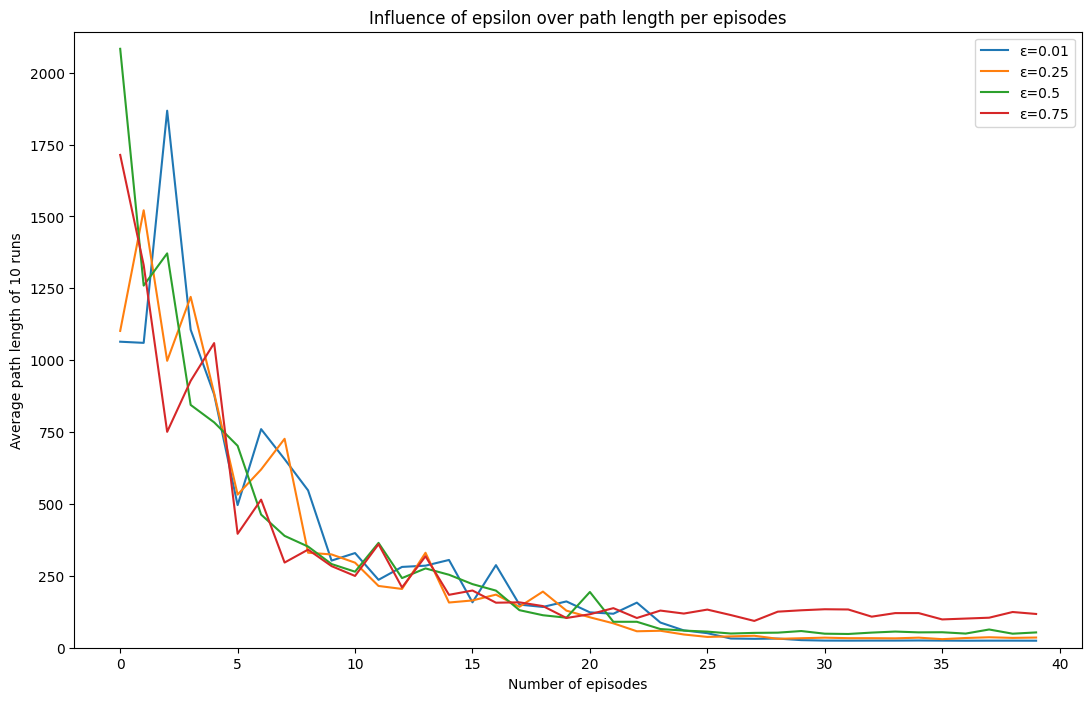

In [94]:
import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

plt.figure(figsize=(13, 8))
plt.title("Influence of epsilon over path length per episodes")

max_y = np.max(np.array(steps_per_episode[ind]) / np.array(runs_reaching_episode[ind])) * 1.25

print(max_y)

for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]) / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)))
    plt.xlabel('Number of episodes')
    plt.ylabel('Average path length of 10 runs')
    plt.ylim(0, max_y)
plt.legend()

[[<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]]
[1064.2, 1060.2, 1867.6, 1106.0, 880.8, 496.0, 760.2, 655.8, 547.2, 303.0, 329.2, 236.2, 281.0, 285.4, 305.2, 158.0, 287.2, 150.0, 141.8, 161.0, 123.0, 118.2, 156.8, 87.6, 60.2, 50.6, 32.0, 31.0, 31.8, 26.4, 24.8, 24.6, 24.8, 24.8, 25.2, 24.8, 24.4, 24.6, 24.6, 24.4]
[1101.8, 1521.4, 997.8, 1220.2, 885.2, 532.6, 619.8, 726.6, 330.4, 324.4, 295.8, 214.8, 204.4, 330.2, 157.2, 164.4, 184.6, 142.4, 195.2, 129.0, 105.8, 84.8, 57.2, 59.0, 46.0, 37.6, 39.4, 41.6, 31.0, 33.0, 35.0, 33.2, 33.2, 32.6, 35.0, 29.8, 33.8, 36.4, 34.2, 35.4]
[2082.8, 1259.4, 1371.4, 844.4, 783.8, 702.2, 463.0, 389.0, 351.8, 291.0, 264.4, 364.6, 242.2, 275.8, 253.8, 221.2, 198.6, 130.6, 113.0, 104.4, 193.8, 90.2, 90.2, 65.0, 59.6, 56.0, 49.4, 51.6, 52.4, 58.0, 48.8, 47.8, 52.6, 56.2, 53.4, 53.8, 49.2, 63.4, 48.8, 53.2]
[1713.8, 1330.8, 750.8, 928.0, 1059.4, 396.2, 515.0, 296.2, 341.2, 283.8, 249.6, 360.0, 209.6, 318.0, 184.0, 199.0, 156.6, 157.8, 1

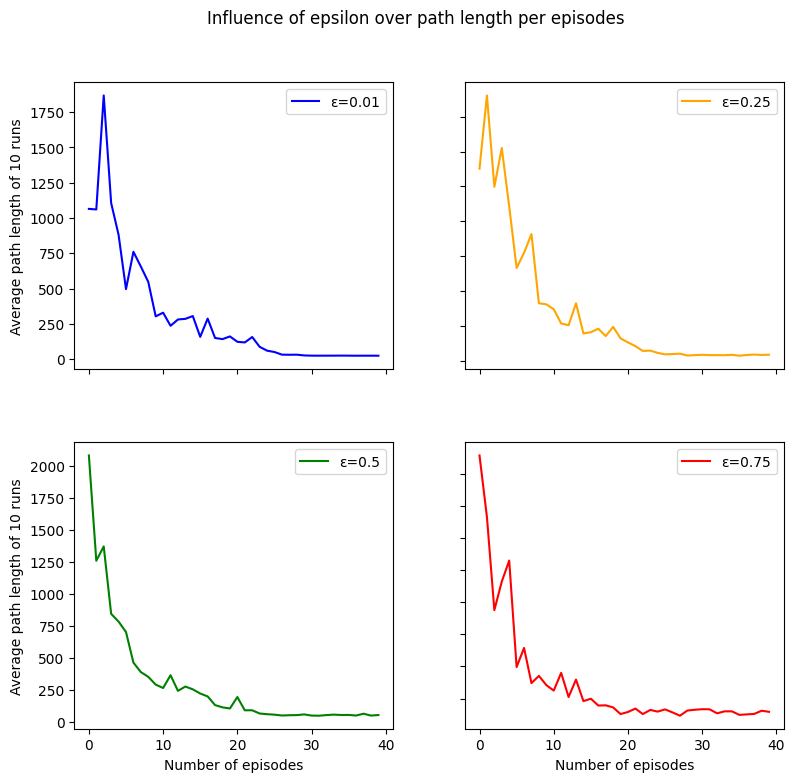

In [73]:
import matplotlib.pyplot as plt
import numpy as np

#print(steps_per_episode)
#print(runs_reaching_episode)

fig, plt_ind = plt.subplots(2, 2)

fig.suptitle("Influence of epsilon over path length per episodes")
fig.tight_layout()

print(plt_ind)

color = ['blue', 'orange', 'green', 'red']

fig.set_size_inches((8, 8))

for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]) / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt_ind[(ind//2, ind % 2)].plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)), c=color[ind])
    plt_ind[(ind//2, ind % 2)].set(xlabel='Number of episodes', ylabel='Average path length of 10 runs')
    #plt_ind[(ind//2, ind % 2)].ylim(0, 1000)
    plt_ind[(ind//2, ind % 2)].legend()
    plt_ind[(ind//2, ind % 2)].label_outer()